In [1]:
load('lbuc/interval_signals.py')

In [2]:
from flowstar.poly import Poly
from flowstar.interval import set_precision
from flowstar.reachability import Reach

In [3]:
set_precision(53)

In [4]:
varsd = ['t', 'x', 'y']
PR.<t, x, y> = RIF[]
qt = PR(1)
qx = -y
qy = x
print("t' = {}\nx' = {}\ny' = {}".format(qt, qx, qy))
D = Reach(
    [qt, qx, qy],
    [(0,0), (4,5), (1,2)],
    10,
    0.75,
    order=10,
   # precondition=1,
    estimation=1e-1,
    cutoff_threshold=1e-20,
)

t' = 1
x' = -y
y' = x
ode in polynomial ring
run = True
vars = ['t', 'x', 'y']
var = t type(var) = <class 'str'> var_str = t
var = x type(var) = <class 'str'> var_str = x
var = y type(var) = <class 'str'> var_str = y


In [5]:
D.res

2

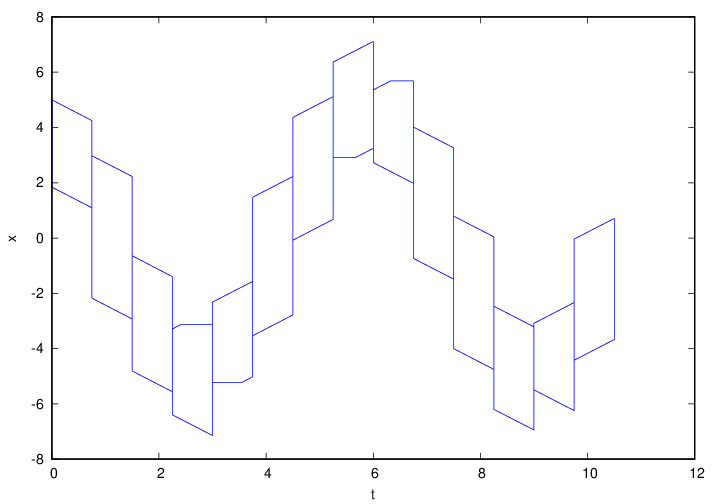

In [6]:
D.wplot('t', 'x')

var_names = [b'local_t', b't', b'x', b'y']
res = b'(([1.0000000000 , 1.0000000000] * x))'
PolyObserver((([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x555f87751b90>, None symbolic_composition=False, tentative_unpreconditioning=False, mask=None)
plot_points = 1000
var_id_x = 0
var_id_y = 1


/usr/lib64/python3.7/site-packages/numpy/core/getlimits.py:400: UserWarning: Signature b'\x99\x99\x99\x99\x99\x99\xb9\xbf' for <class 'numpy.float64'> does not match any known type: falling back to type probe function
  machar = _get_machar(dtype)


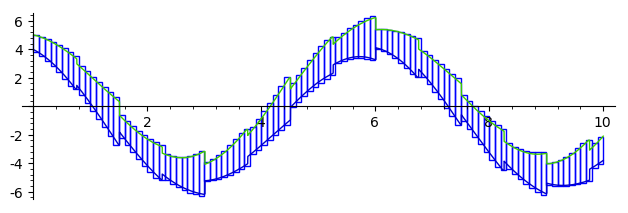

In [7]:
g = D.sage_plot(x) + D.sage_interval_plot('t','x')
g.set_aspect_ratio(1/4)
g

In [8]:
def f(v, x):
    x = RIF(x)
    res = D(x)
    return RIF(res[varsd.index(v)])

In [9]:
from functools import partial

In [10]:
p1 = D.sage_plot('x')

var_names = [b'local_t', b't', b'x', b'y']
res = b'(([1.0000000000 , 1.0000000000] * x))'
PolyObserver((([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x555f87751b90>, None symbolic_composition=False, tentative_unpreconditioning=False, mask=None)
plot_points = 1000


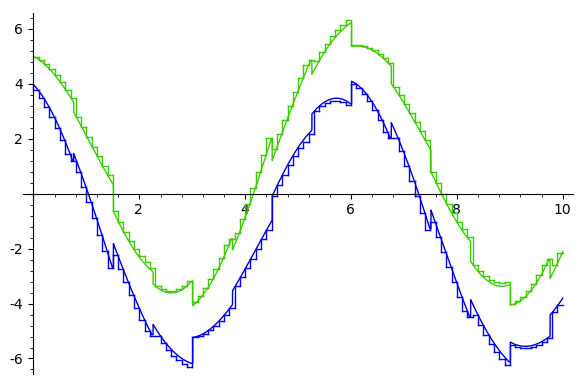

In [11]:
p1 + D.sage_plot_manual('x')

var_names = [b'local_t', b't', b'x', b'y']
res = b'(([1.0000000000 , 1.0000000000] * y))'
PolyObserver((([1.0000000000 , 1.0000000000] * y)), <flowstar.reachability.Reach object at 0x555f87751b90>, None symbolic_composition=False, tentative_unpreconditioning=False, mask=None)
plot_points = 1000


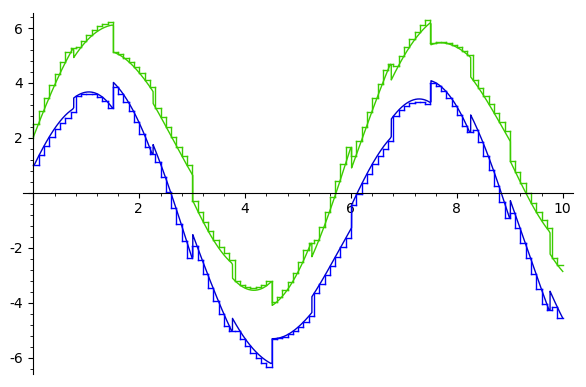

In [12]:
D.sage_plot('y') \
 + D.sage_plot_manual('y')

$x' = - y$

In [13]:
p2 = plot([(lambda t: -f('y', t).upper()),
          (lambda t: -f('y', t).lower())], (0, 10))

Will not work -- signal is not continuously differentiable

In [14]:
sig = to_signal((lambda t: f('x', t)),
                (lambda t: -f('y', t)),
                RIF(0, 10))
sig

domain = [0.0000000000000000 .. 10.000000000000000]
roots = [[1.0471492695953230 .. 1.4104643122606349], 
 [1.4114643122606349 .. 1.5140032130684591], 
 [4.1662548778533023 .. 4.1662558778533026], 
 [4.1672558778533028 .. 4.5186109239559036], 
 [7.2874631549297097 .. 7.6980956095104354]]
seg_domain = [0.0000000000000000 .. 10.000000000000000]
roots = []


Signal([0.0000000000000000 .. 10.000000000000000], [([0.0000000000000000 .. 10.000000000000000], True)], mask=None)

/usr/lib64/python3.7/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


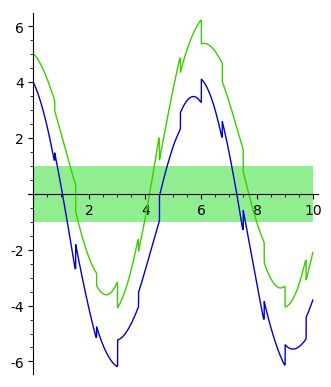

In [15]:
sig.plot() + p1

In [39]:
observer = PolyObserver(x, D)

PolyObserver(x, <flowstar.reachability.Reach object at 0x555f87751b90>, None symbolic_composition=False, tentative_unpreconditioning=False, mask=None)


In [41]:
sig = signal_from_observer(observer, RIF(0, 10), global_root_detection=True); sig

var_names = [b'local_t', b't', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([-1.0000000000 , -1.0000000000] * y)), <flowstar.reachability.Reach object at 0x555f87751b90>, None symbolic_composition=False, tentative_unpreconditioning=False, mask=None)
domain = [0.0000000000000000 .. 10.000000000000000]
roots = [[1.0236946531666673 .. 1.6077075766448226], 
 [4.0713359586472970 .. 4.7572196961867546], 
 [5.2442561799370439 .. 10.000000000000000]]
seg_domain = [0.0000000000000000 .. 10.000000000000000]
roots = [[1.0236946531666673 .. 1.6077075766448226], 
 [4.0713359586472970 .. 4.7572196961867546], 
 [5.2442561799370439 .. 10.000000000000000]]


Signal([0.0000000000000000 .. 10.000000000000000], [([0.0000000000000000 .. 1.0236946531666674], True), ([1.6077075766448225 .. 4.0713359586472971], False), ([4.7572196961867545 .. 5.2442561799370440], True), ([10.000000000000000 .. 10.000000000000000], False)], mask=None)

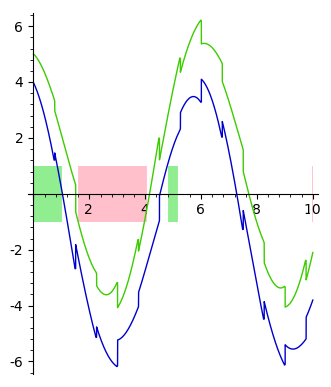

In [42]:
sig.plot() + p1

In [43]:
observer = PolyObserver(x, D, symbolic_composition=True)

PolyObserver(x, <flowstar.reachability.Reach object at 0x555f87751b90>, None symbolic_composition=True, tentative_unpreconditioning=False, mask=None)


In [44]:
sig = signal_from_observer(observer, RIF(0, 10), global_root_detection=True); sig

var_names = [b'local_t', b't', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([-1.0000000000 , -1.0000000000] * y)), <flowstar.reachability.Reach object at 0x555f87751b90>, None symbolic_composition=True, tentative_unpreconditioning=False, mask=None)
domain = [0.0000000000000000 .. 10.000000000000000]
roots = [[1.0236946531666673 .. 1.6077075766448228], 
 [4.0713359586472970 .. 4.7572196961867546], 
 [5.2442561799370439 .. 10.000000000000000]]
seg_domain = [0.0000000000000000 .. 10.000000000000000]
roots = [[1.0236946531666673 .. 1.6077075766448228], 
 [4.0713359586472970 .. 4.7572196961867546], 
 [5.2442561799370439 .. 10.000000000000000]]


Signal([0.0000000000000000 .. 10.000000000000000], [([0.0000000000000000 .. 1.0236946531666674], True), ([1.6077075766448227 .. 4.0713359586472971], False), ([10.000000000000000 .. 10.000000000000000], False)], mask=None)

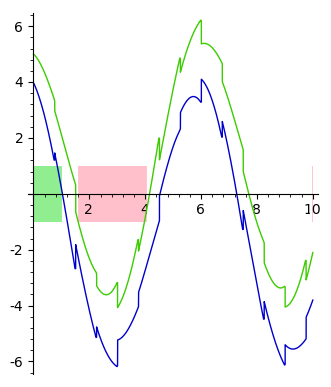

In [45]:
sig.plot() + p1

In [39]:
observer = PolyObserver(x, D)

PolyObserver(x, <flowstar.reachability.Reach object at 0x555f87751b90>, None symbolic_composition=False, tentative_unpreconditioning=False, mask=None)


In [41]:
sig = signal_from_observer(observer, RIF(0, 10), global_root_detection=True); sig

var_names = [b'local_t', b't', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([-1.0000000000 , -1.0000000000] * y)), <flowstar.reachability.Reach object at 0x555f87751b90>, None symbolic_composition=False, tentative_unpreconditioning=False, mask=None)
domain = [0.0000000000000000 .. 10.000000000000000]
roots = [[1.0236946531666673 .. 1.6077075766448226], 
 [4.0713359586472970 .. 4.7572196961867546], 
 [5.2442561799370439 .. 10.000000000000000]]
seg_domain = [0.0000000000000000 .. 10.000000000000000]
roots = [[1.0236946531666673 .. 1.6077075766448226], 
 [4.0713359586472970 .. 4.7572196961867546], 
 [5.2442561799370439 .. 10.000000000000000]]


Signal([0.0000000000000000 .. 10.000000000000000], [([0.0000000000000000 .. 1.0236946531666674], True), ([1.6077075766448225 .. 4.0713359586472971], False), ([4.7572196961867545 .. 5.2442561799370440], True), ([10.000000000000000 .. 10.000000000000000], False)], mask=None)

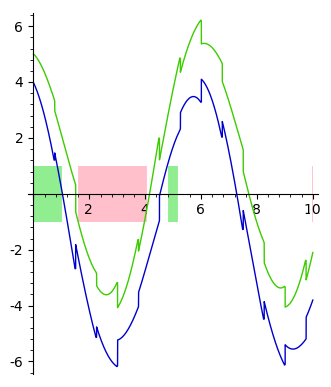

In [42]:
sig.plot() + p1

In [53]:
%time
sig1 = signal_from_observer(observer, RIF(0, 4), global_root_detection=True); sig1

CPU times: user 3 µs, sys: -0 ns, total: 3 µs
Wall time: 6.44 µs
var_names = [b'local_t', b't', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([-1.0000000000 , -1.0000000000] * y)), <flowstar.reachability.Reach object at 0x555f87751b90>, None symbolic_composition=True, tentative_unpreconditioning=False, mask=None)
domain = [0.0000000000000000 .. 4.0000000000000000]
roots = [[0.99509829722296527 .. 1.6162738902549357]]
seg_domain = [0.0000000000000000 .. 4.0000000000000000]
roots = [[0.99509829722296527 .. 1.6162738902549357]]


Signal([0.0000000000000000 .. 4.0000000000000000], [([0.0000000000000000 .. 0.99509829722296528], True), ([1.6162738902549356 .. 4.0000000000000000], False)], mask=None)

In [51]:
sig2 = signal_from_observer(observer, RIF(4, 10), global_root_detection=True); sig2

var_names = [b'local_t', b't', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([-1.0000000000 , -1.0000000000] * y)), <flowstar.reachability.Reach object at 0x555f87751b90>, None symbolic_composition=True, tentative_unpreconditioning=False, mask=None)
domain = [4.0000000000000000 .. 10.000000000000000]
roots = [[4.0000000000000000 .. 4.8059959023516888], 
 [7.2191933142193338 .. 7.7115871835023171]]
seg_domain = [4.0000000000000000 .. 10.000000000000000]
roots = [[4.0000000000000000 .. 4.8059959023516888], 
 [7.2191933142193338 .. 7.7115871835023171]]


Signal([4.0000000000000000 .. 10.000000000000000], [([4.8059959023516887 .. 7.2191933142193339], True), ([7.7115871835023170 .. 10.000000000000000], False)], mask=None)

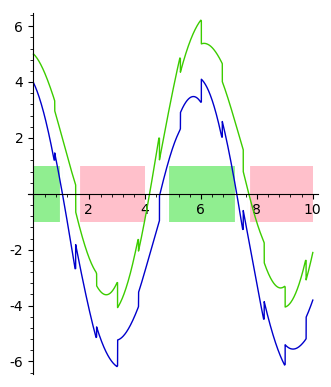

In [52]:
sig1.plot() + sig2.plot() + p1

In [16]:
sig = to_signal_bisection((lambda t: f('x', t)), RIF(0, 10), 0.1)

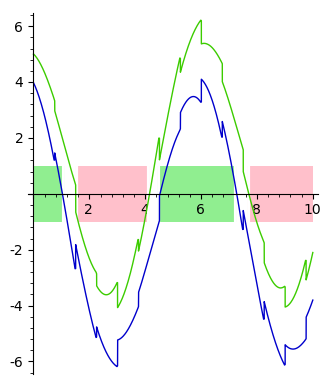

In [17]:
sig.plot() + p1

In [18]:
load('lbuc/interval_root_isolation.py')

In [19]:
roots = list(isolate_roots((lambda t: f('x', t)),
                           (lambda t: -f('y', t)),
                           RIF(0,1.5)))
roots

[2.?]

In [20]:
from flowstar.observers import PolyObserver

In [21]:
observer = PolyObserver(x, D)

PolyObserver(x, <flowstar.reachability.Reach object at 0x555f87751b90>, None symbolic_composition=False, tentative_unpreconditioning=False, mask=None)


In [22]:
from lbuc.interval_utils import fintervals

In [23]:
fintervals(observer.roots_global(RIF(0, 10)))

var_names = [b'local_t', b't', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([-1.0000000000 , -1.0000000000] * y)), <flowstar.reachability.Reach object at 0x555f87751b90>, None symbolic_composition=False, tentative_unpreconditioning=False, mask=None)


'[[1.0236946531666673 .. 1.6077075766448226], [4.0713359586472970 .. 4.7572196961867546], [5.2442561799370439 .. 10.000000000000000]]'

In [24]:
roots += list(isolate_roots((lambda t: f('x', t)),
                            (lambda t: -f('y', t)),
                            RIF(1.5,2)))
roots

[2.?, 1.500001?]

In [25]:
lo, hi = RIF(0,2).lower(), RIF(0,2).upper(); lo, hi

(0.000000000000000, 2.00000000000000)

In [26]:
f('x', RIF(1.5,2)).str(style='brackets')

'[-4.2765187144268513 .. 0.31808372648673178]'

In [27]:
roots[0].str(style='brackets')

'[1.0471490191358754 .. 1.5000000000000000]'

In [28]:
roots[1].str(style='brackets')

'[1.5000000000000000 .. 1.5000010000000002]'

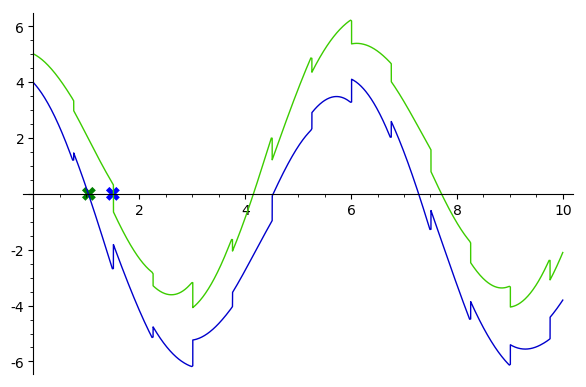

In [29]:
  p1 \
+ point((roots[0].lower(), 0), size=100, color='green', marker='X') \
+ point((roots[1].upper(), 0), size=100, marker='X')

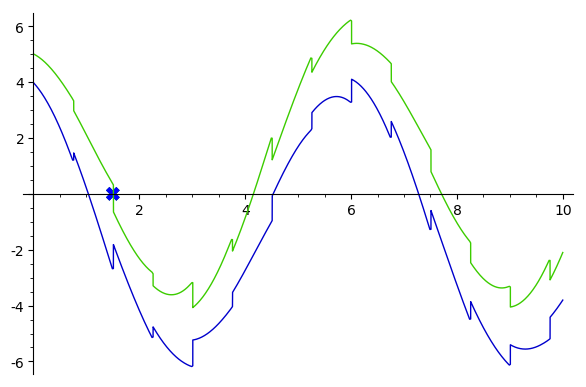

In [30]:
  p1 \
+ point((roots[1].lower(), 0), size=100, color='green', marker='X') \
+ point((roots[1].upper(), 0), size=100, marker='X')

In [31]:
sig = Signal(RIF(0), [])
step = 0.75
for i in range(round(10/step)):
    sig = sig.union(to_signal((lambda t: f('x', t)),
                              (lambda t: -f('y', t)),
                              RIF(step*i, step*(i+1))))
sig

domain = [0.0000000000000000 .. 0.75000000000000000]
roots = []
seg_domain = [0.0000000000000000 .. 0.75000000000000000]
roots = []
domain = [0.75000000000000000 .. 1.5000000000000000]
roots = [[1.0471493894806140 .. 1.5000000000000000]]
seg_domain = [0.75000000000000000 .. 1.5000000000000000]
roots = []
0 at 1.50000000000000
domain = [1.5000000000000000 .. 2.2500000000000000]
roots = [[1.5000000000000000 .. 1.5000010000000002]]
seg_domain = [1.5000000000000000 .. 2.2500000000000000]
roots = []
domain = [2.2500000000000000 .. 3.0000000000000000]
roots = []
seg_domain = [2.2500000000000000 .. 3.0000000000000000]
roots = []
domain = [3.0000000000000000 .. 3.7500000000000000]
roots = []
seg_domain = [3.0000000000000000 .. 3.7500000000000000]
roots = []
domain = [3.7500000000000000 .. 4.5000000000000000]
roots = [[4.1662557181795145 .. 4.5000000000000000]]
seg_domain = [3.7500000000000000 .. 4.5000000000000000]
roots = []
domain = [4.5000000000000000 .. 5.2500000000000000]
roots = [[4.5000

Signal([0.0000000000000000 .. 9.7500000000000000], [([0.0000000000000000 .. 0.75000000000000000], True), ([1.5000000000000000 .. 4.5000000000000000], False), ([4.5000000000000000 .. 7.5000000000000000], True), ([7.5000000000000000 .. 9.7500000000000000], False)], mask=None)

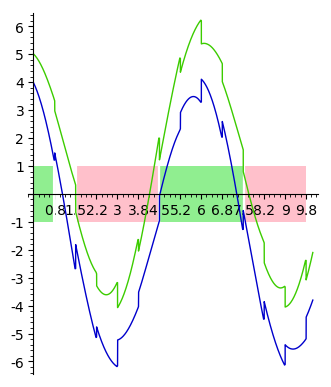

In [32]:
(sig.plot() + p1).show(ticks=[0.75, 1])

In [33]:
sig1 = Signal(RIF(0), [])
step = 0.75
for i in range(round(10/step)):
    sig1 = sig1.union(to_signal_bisection((lambda t: f('x', t)),
                                          RIF(step*i, step*(i+1))))
sig1

Signal([0.0000000000000000 .. 9.7500000000000000], [([0.0000000000000000 .. 1.0312500000000000], True), ([1.5937500000000000 .. 4.1250000000000000], False), ([4.5937500000000000 .. 7.2187500000000000], True), ([7.7812500000000000 .. 9.7500000000000000], False)], mask=None)

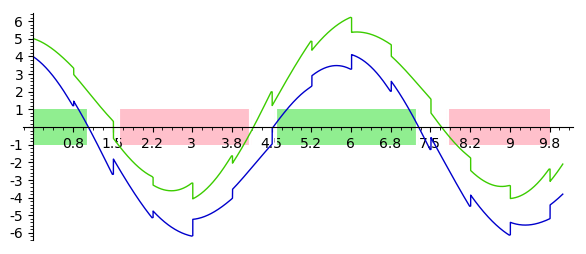

In [34]:
g = (sig1.plot() + p1)
g.set_aspect_ratio(1/3)
g.show(ticks=[0.75, 1])

In [35]:
def to_signal_piecewise(f, fprime, time, step):
    sig = Signal(RIF(0), [])
    for i in range(ceil(time/step)):
        sig = sig.union(to_signal(f, fprime, RIF(step*i, step*(i+1))))
    return sig

domain = [0.0000000000000000 .. 0.75000000000000000]
roots = []
seg_domain = [0.0000000000000000 .. 0.75000000000000000]
roots = []
domain = [0.75000000000000000 .. 1.5000000000000000]
roots = [[1.1140046884892569 .. 1.5000000000000000]]
seg_domain = [0.75000000000000000 .. 1.5000000000000000]
roots = []
0 at 1.50000000000000
domain = [1.5000000000000000 .. 2.2500000000000000]
roots = [[1.5000000000000000 .. 1.5000010000000002]]
seg_domain = [1.5000000000000000 .. 2.2500000000000000]
roots = []
domain = [2.2500000000000000 .. 3.0000000000000000]
roots = []
seg_domain = [2.2500000000000000 .. 3.0000000000000000]
roots = []
domain = [3.0000000000000000 .. 3.7500000000000000]
roots = []
seg_domain = [3.0000000000000000 .. 3.7500000000000000]
roots = []
domain = [3.7500000000000000 .. 4.5000000000000000]
roots = [[4.1821739492578782 .. 4.5000000000000000]]
seg_domain = [3.7500000000000000 .. 4.5000000000000000]
roots = []
domain = [4.5000000000000000 .. 5.2500000000000000]
roots = [[4.5000

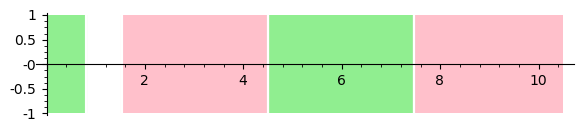

In [36]:
to_signal_piecewise((lambda t: f('x', t)), (lambda t: -f('x', t)),
                    10, 0.75).plot()

domain = [4.5000000000000000 .. 5.7500000000000000]
roots = [[4.5000000000000000 .. 4.5451010100000016]]
seg_domain = [4.5000000000000000 .. 5.7500000000000000]
roots = []


/usr/lib64/python3.7/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


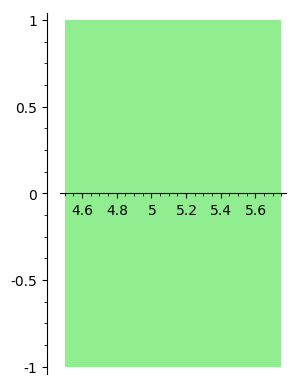

In [37]:
to_signal((lambda t: f('x', t)), (lambda t: -f('x', t)),
          RIF(4.5,5.75)).plot()

## Contexts

In [38]:
varsc = [b't', b'x']
pt = Poly(1, 't', 0, varsc)
px = Poly(-1, 'x', 1, varsc)
print "t' = {}\nx' = {}".format(pt, px)

SyntaxError: invalid syntax (<ipython-input-38-63cd1c71daba>, line 4)

In [ ]:
C0 = Reach(
    varsc,
    [pt, px],
    [(0,0), (4.5,5)],
    5,
    0.7,
    order=10,
)

In [ ]:
C1 = Reach(
    varsc,
    [pt, px],
    [(0,0), (4.5,5)],
    1,
    0.7,
    order=10,
)

In [ ]:
C0.sage_plot('x')

In [ ]:
C1((1.0,1.0))

In [ ]:
C2 = Reach(
    varsc,
    [pt, px],
    [(RIF(x) + RIF(1.5,2) if i == 1 else x) for i, x in enumerate(C1((1.0,1.0)))],
    4,
    0.7,
    order=10,
)

In [ ]:
C1.sage_time_tube_plot('x',0.01,joins=False)\
 + C2.sage_time_tube_plot('x',0.01,joins=False)

In [ ]:
load('interval_signals.py')

In [ ]:
def rifify(f):
    return lambda t: [RIF(x) for x in f(t)]

In [ ]:
def continuation(xs):
    print xs
    return rifify(Reach(
        varsc,
        [pt, px],
        xs,
        5,
        0.5,
        order=10,
    ))

In [ ]:
sig = ctx(
    I=RIF(0,5),
    C=(lambda xs: [x + RIF(1.5,2) if i == 1 else x
                        for i, x in enumerate(xs)]),
    phi=(lambda f: None if 4 in f(0)[1] else f(0)[1] < 4),
    f=rifify(C0),
    g=continuation,
    epsilon=0.1,
)
sig

In [ ]:
sig.plot()

In [ ]:
phi = lambda f: to_signal(lambda t: f(t)[1] - 2,
                          lambda t: -f(t)[1],
                          RIF(0,1)
                          ).G(RIF(0,0.2))(0)

sig = ctx(
    I=RIF(0,5),
    C=(lambda xs: [x + RIF(1.5,2) if i == 1 else x
                        for i, x in enumerate(xs)]),
    phi=phi,
    f=rifify(C0),
    g=continuation,
    epsilon=0.1,
)
sig

In [ ]:
sig.plot()